In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%pylab inline
pd.set_option('display.max_column',None)

Populating the interactive namespace from numpy and matplotlib


## Data gathering
Data gathering:
- Activities files (from 2015 - 2019, Ayuntamiento Madrid)
- Madrid population database (1st january 2019, Ayuntamiento Madrid)
- Madrid floating population (16-22 april 2018, Private source)

In [4]:
os.getcwd()

'/home/dsc/Python_notebooks/TFM/TBV/TBV_v1'

### Activities file: 
We load the file into memory as a pandas dataframe. Files are uncompressed.   
Careful with separators: some cleaning through Command Line has beeen necessary to remove "ambigous separators": clean versions of the files.   
Encoding is Latin9 (although in documentation UTF8 is mentioned).      
After checking all files available in Madrid web portal (locals, licences and activities (== epigrafes in Spanish), I will work over epigrafes file that contains all the locals and status.   
Since the study is being done on a yearly basis and 2019 data is only available till Sep'19, I will use the September versions for all the files   
I decided not use 2014 file since doesn'thave the same fields as the others and goes further in time.  

In [ ]:
path_to_file = '/home/dsc/Repos/TFM-Test-your-business-viability/Data/censolocales/'

In [9]:
cd {path_to_file}

/home/dsc/Repos/TFM-Test-your-business-viability/Data/censolocales


In [10]:
# 2019 data. A clean version is needed to correct wrong separators
df_epi19 = pd.read_csv('OPEN DATA Locales-Epigrafes201909_clean.csv',sep=';',encoding='latin9')
# 2018 data. A clean version is needed to correct wrong separators
df_epi18 = pd.read_csv('OPEN DATA Locales-Epigrafes201809_clean.csv',sep=';',encoding='latin9')
# 2017 data. September file was corrupted (many NaN). I will use Nov. file instead
df_epi17 = pd.read_csv('OPEN DATA Locales-Epigrafes201711_clean.csv',sep=';',encoding='latin9')
# 2016 data. This file is ok, no clean version is needed.
df_epi16 = pd.read_csv('OPEN DATA Locales-Epigrafes201609.csv',sep=';',encoding='latin9')
# 2015 data. This file is ok, no clean version is needed.
df_epi15 = pd.read_csv('OPEN DATA Locales-Epigrafes201509.csv',sep=';',encoding='latin9')

/home/dsc/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Each new year file contains the locals of previous years and the new that year. All of the have the same columns

In [11]:
df_epi19.shape, df_epi18.shape, df_epi17.shape, df_epi16.shape, df_epi15.shape

((163355, 46), (162467, 46), (161097, 46), (159604, 46), (157206, 46))

In [13]:
df_epi19.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'cod_barrio_local',
       'id_seccion_censal_local', 'desc_seccion_censal_local',
       'coordenada_x_local', 'coordenada_y_local', 'id_tipo_acceso_local',
       'desc_tipo_acceso_local', 'id_situacion_local', 'desc_situacion_local',
       'id_vial_edificio', 'clase_vial_edificio', 'desc_vial_edificio',
       'id_ndp_edificio', 'id_clase_ndp_edificio', 'nom_edificio',
       'num_edificio', 'cal_edificio', 'secuencial_local_PC', 'id_vial_acceso',
       'clase_vial_acceso', 'desc_vial_acceso', 'id_ndp_acceso',
       'id_clase_ndp_acceso', 'nom_acceso', 'num_acceso', 'cal_acceso',
       'coordenada_x_agrupacion', 'coordenada_y_agrup', 'id_agrupacion',
       'nombre_agrupacion', 'id_tipo_agrup', 'desc_tipo_agrup',
       'id_planta_agrupado', 'id_local_agrupado', 'rotulo', 'id_seccion',
       'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe',
       'desc_epi

In [17]:
df_epi19.head(2)

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
0,270440895,3,RETIRO,304,IBIZA,NaN,NaN,55,0,0,NaN,Agrupado,NaN,Abierto,370400,CALLE,IBIZA ...,11012388,1,NUM,8,,0,NaN,CALLE,IBIZA ...,11012388,1,NUM,8,,"442533,58","4474389,51",99000191.0,MERCADO MUNICIPAL DE IBIZA,12.0,Mercado Municipal,PB,7,BAR HERMANOS BENAYAS,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,563005,BAR SIN COCINA
1,270440899,5,CHAMARTIN,502,PROSPERIDAD,NaN,NaN,23,"443460,59","4477604,5",NaN,Puerta Calle,NaN,Abierto,210200,CALLE,CORAZON DE MARIA ...,20138306,1,NUM,57,,20,NaN,CALLE,CORAZON DE MARIA ...,20138306,1,NUM,57,,NaN,NaN,NaN,NaN,NaN,NaN,PB,NaN,LA PARRILLA BERENGUER,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561005,BAR CON COCINA


There are more rows in the files than unique locals. This is because the same local can be licenced with one or more activities

In [12]:
len(df_epi19['id_local'].unique()), len(df_epi18['id_local'].unique()), len(df_epi17['id_local'].unique()),\
len(df_epi16['id_local'].unique()),len(df_epi15['id_local'].unique())

(147344, 146607, 145752, 144920, 144048)

### Madrid Population database
Not available in v1

'''Censo'''
df1 = pd.read_excel('/home/dsc/Repos/TFM-Test-your-business-viability/Data/censopob/censo_Madrid_distrito.xlsx')
df1.head()
df1.dtypes

### Madrid floating population
Not available in v1

'''Población flotante'''
df2 = pd.read_excel('/home/dsc/Repos/TFM-Test-your-business-viability/Data/PF/PF_diaria_norm.xlsx')
df2.head()
df2.dtypes

## Data cleaning
- NaN treatment
- Status normalization
- UTM Coordinates - geographic coordinates conversion
- Distance beetween locals calculation
- Merge in a single DataFrame
- Selection of activities based on target sample

I have created a modules script (clean_functions.py) with the main functions used

In [90]:
import importlib
import clean_functions as cl
importlib.reload(cl)

<module 'clean_functions' from '/home/dsc/Python_notebooks/TFM/TBV/TBV_v1/clean_functions.py'>

### NaN treatment
- NaN are locales with no activity (according to 'rotulo' variable).  
- A couple of 'rotulo' values are wrong in origin file. I correct that in origin.
- I will drop activities == 'LOCAL SIN ACTIVIDAD' because I cann't know the activity in advance for the study.   
- I regularize the locals that not belong to a group (desc_tipo_acceso_local == NaN) with the right values (not group)
- I fill in the column id_situation local that is empty in activities file (although fill in in locals file)
Most of the functions are in the script: clean_functions.py

In [18]:
df_epi19[df_epi19.desc_epigrafe.isnull()].groupby('rotulo').count()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
rotulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SIN ACTIVIDAD,41276,41276,41276,41276,41276,0,0,41276,41276,41276,0,41276,0,41276,41276,41276,41276,41276,41276,41276,41276,41276,41276,0,41276,41276,41276,41276,41276,41276,41276,3017,3017,3017,3017,3017,3017,41072,2992,0,0,0,0,0,0


In [19]:
df_epi18[df_epi18.desc_epigrafe.isnull()].groupby('rotulo').count()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
rotulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SIN ACTIVIDAD,42051,42051,42051,42051,42051,0,0,42051,42051,42051,0,42051,0,42051,42051,42051,42051,42051,42051,42051,42051,42051,42051,0,42051,42051,42051,42051,42051,42051,42051,3056,3056,3056,3056,3056,3056,41840,3031,0,0,0,0,0,0


In [20]:
df_epi17[df_epi17.desc_epigrafe.isnull()].groupby('rotulo').count()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
rotulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SIN ACTIVIDAD,42527,42527,42527,42527,42527,0,0,42527,42527,42527,0,42527,0,42527,42527,42527,42527,42527,42527,42527,42527,42527,42527,0,42527,42527,42527,42527,42527,42527,42527,3060,3060,3060,3060,3060,3060,42298,3035,0,0,0,0,0,0


In [21]:
df_epi16[df_epi16.desc_epigrafe.isnull()].groupby('rotulo').count()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
rotulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SIN ACTIVIDAD,43549,43549,43549,43549,43549,0,0,43549,43549,43549,0,43549,0,43549,43549,43549,43549,43549,43549,43549,43549,43549,43549,0,43549,43549,43549,43549,43549,43549,43549,3005,3005,3005,3005,3005,3005,2882,2981,0,0,0,0,0,0


In [22]:
df_epi15[df_epi15.desc_epigrafe.isnull()].groupby('rotulo').count()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,id_tipo_acceso_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,id_vial_edificio,clase_vial_edificio,desc_vial_edificio,id_ndp_edificio,id_clase_ndp_edificio,nom_edificio,num_edificio,cal_edificio,secuencial_local_PC,id_vial_acceso,clase_vial_acceso,desc_vial_acceso,id_ndp_acceso,id_clase_ndp_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
rotulo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SIN ACTIVIDAD,44915,44915,44915,44915,44915,0,0,44915,44915,44915,0,44915,0,44915,44915,44915,44915,44915,44915,44915,44915,44915,44915,0,44915,44915,44915,44915,44915,44915,44915,3066,3066,3066,3066,3066,3066,2940,3037,0,0,0,0,0,0


New column: 'conc'. It concatenates 'rotulo' column with its direction to identify unique local activities
All this with function **cl.new_col**

In [24]:
df_epi19 = cl.new_col(df_epi19)
df_epi18 = cl.new_col(df_epi18)
df_epi17 = cl.new_col(df_epi17)
df_epi16 = cl.new_col(df_epi16)
df_epi15 = cl.new_col(df_epi15)

In [25]:
df_epi15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157206 entries, 0 to 157205
Data columns (total 47 columns):
id_local                     157206 non-null int64
id_distrito_local            157206 non-null int64
desc_distrito_local          157206 non-null object
id_barrio_local              157206 non-null int64
desc_barrio_local            157206 non-null object
cod_barrio_local             0 non-null float64
id_seccion_censal_local      0 non-null float64
desc_seccion_censal_local    157206 non-null int64
coordenada_x_local           157206 non-null float64
coordenada_y_local           157206 non-null float64
id_tipo_acceso_local         0 non-null float64
desc_tipo_acceso_local       157206 non-null object
id_situacion_local           0 non-null float64
desc_situacion_local         157206 non-null object
id_vial_edificio             157206 non-null int64
clase_vial_edificio          157206 non-null object
desc_vial_edificio           157206 non-null object
id_ndp_edificio         

In [26]:
df_epi19_cl = df_epi19.copy()
df_epi18_cl = df_epi18.copy()
df_epi17_cl = df_epi17.copy()
df_epi16_cl = df_epi16.copy()
df_epi15_cl = df_epi15.copy()

I simplify the local status by unifying in 'Cerrado':
- status that starts with 'Baja' 
- those locals with 'desc epigrafe' == 'LOCAL SIN ACTIVIDAD'
All this with function **cl.estado**.

In [29]:
df_epi19_cl['desc_situacion_local'].value_counts()

Abierto               117830
Cerrado                34738
Uso vivienda            6473
Baja Reunificacion      2444
Baja                    1018
En obras                 841
Baja PC Asociado          11
Name: desc_situacion_local, dtype: int64

In [27]:
df_epi19_cl['desc_sit_loc_modif'] = cl.estado(df_epi19_cl['desc_epigrafe'],df_epi19_cl['desc_situacion_local'])
df_epi18_cl['desc_sit_loc_modif'] = cl.estado(df_epi18_cl['desc_epigrafe'],df_epi18_cl['desc_situacion_local'])
df_epi17_cl['desc_sit_loc_modif'] = cl.estado(df_epi17_cl['desc_epigrafe'],df_epi17_cl['desc_situacion_local'])
df_epi16_cl['desc_sit_loc_modif'] = cl.estado(df_epi16_cl['desc_epigrafe'],df_epi16_cl['desc_situacion_local'])
df_epi15_cl['desc_sit_loc_modif'] = cl.estado(df_epi15_cl['desc_epigrafe'],df_epi15_cl['desc_situacion_local'])

In [28]:
df_epi19_cl['desc_sit_loc_modif'].value_counts()

Abierto         116704
Cerrado          39337
Uso vivienda      6473
En obras           841
Name: desc_sit_loc_modif, dtype: int64

I manage NaN with module **cl.na**:   
- NaN in locales with no activity (according to 'rotulo' variable).
- I regularize the locals that not belong to a group (desc_tipo_acceso_local == NaN) with the right values (not group)
- I fill in the column id_situation local that is empty in activities file (although fill in in locals file) Most of the functions are in the script: clean_functions.py
I do this for 2019 file since it is going to be my base dataframe to merge with the status of the following years

In [30]:
df_epi19_cl_d = cl.na(df_epi19_cl)

I select the minimum columns to identify locals and its status to merge the years from 2015 to 2018 with 2019 info. I do this with function: **cl.col_rest**.

In [31]:
df_epi18_cl_d = cl.col_rest(df_epi18_cl)
df_epi17_cl_d = cl.col_rest(df_epi17_cl)
df_epi16_cl_d = cl.col_rest(df_epi16_cl)
df_epi15_cl_d = cl.col_rest(df_epi15_cl)

I check there are no duplicates and reset_index with function **cl.reset**

In [32]:
df_epi15_cl_d.drop_duplicates(inplace = True)
df_epi16_cl_d.drop_duplicates(inplace = True)
df_epi17_cl_d.drop_duplicates(inplace = True)
df_epi18_cl_d.drop_duplicates(inplace = True)
df_epi19_cl_d.drop_duplicates(inplace = True)

cl.reset(df_epi15_cl_d)
cl.reset(df_epi16_cl_d)
cl.reset(df_epi17_cl_d)
cl.reset(df_epi18_cl_d)
cl.reset(df_epi19_cl_d)

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,coordenada_x_local,coordenada_y_local,desc_tipo_acceso_local,id_situacion_local,desc_situacion_local,clase_vial_acceso,desc_vial_acceso,nom_acceso,num_acceso,cal_acceso,coordenada_x_agrupacion,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,rotulo,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe,conc,desc_sit_loc_modif
0,10000003,1,CENTRO,104,JUSTICIA,"440554,59","4475338,53",Puerta Calle,1.0,Abierto,CALLE,BARCELO ...,NUM,5,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,VITACA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561004,BAR RESTAURANTE,VITACA-BARCELO-5,Abierto
1,10000003,1,CENTRO,104,JUSTICIA,"440554,59","4475338,53",Puerta Calle,1.0,Abierto,CALLE,BARCELO ...,NUM,5,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,VITACA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561006,CAFETERIA,VITACA-BARCELO-5,Abierto
2,10000004,1,CENTRO,105,UNIVERSIDAD,"439945,6","4475591,53",Puerta Calle,1.0,Abierto,CALLE,ACUERDO ...,NUM,31,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,BAR LA PARADA ...,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561006,CAFETERIA,BAR LA PARADA-ACUERDO-31,Abierto
3,10000013,1,CENTRO,102,EMBAJADORES,"441199,58","4473326,52",Puerta Calle,1.0,Abierto,PLAZA,EMPERADOR CARLOS V ...,NUM,8,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,HOTEL MEDIODIA,I,HOSTELERIA,55,SERVICIOS DE ALOJAMIENTO,551001,HOTELES Y MOTELES CON RESTAURANTE,HOTEL MEDIODIA-EMPERADOR CARLOS V-8,Abierto
4,10000044,1,CENTRO,101,PALACIO,"439722,59","4473550,53",Puerta Calle,1.0,Abierto,CALLE,HUMILLADERO ...,NUM,16,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,V.M. VINOMANIA,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",472502,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...,V.M. VINOMANIA-HUMILLADERO-16,Abierto
5,10000052,1,CENTRO,104,JUSTICIA,"440875,59","4475142,52",Puerta Calle,1.0,Abierto,CALLE,PELAYO ...,NUM,57,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,LA ESQUINA DE SANTI,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561005,BAR CON COCINA,LA ESQUINA DE SANTI-PELAYO-57,Abierto
6,10000071,1,CENTRO,106,SOL,"440388,59","4474077,53",Puerta Calle,1.0,Abierto,CALLE,BARCELONA ...,NUM,12,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,LA DESCUBIERTA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561006,CAFETERIA,LA DESCUBIERTA-BARCELONA-12,Abierto
7,10000071,1,CENTRO,106,SOL,"440388,59","4474077,53",Puerta Calle,1.0,Abierto,CALLE,BARCELONA ...,NUM,12,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,LA DESCUBIERTA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561001,RESTAURANTE,LA DESCUBIERTA-BARCELONA-12,Abierto
8,10000093,1,CENTRO,104,JUSTICIA,"440953,59","4474656,52",Puerta Calle,1.0,Abierto,PLAZA,REY ...,NUM,4,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,LA REVOLTOSA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561006,CAFETERIA,LA REVOLTOSA-REY-4,Abierto
9,10000097,1,CENTRO,104,JUSTICIA,"440851,59","4474857,52",Puerta Calle,1.0,Abierto,CALLE,LIBERTAD ...,NUM,31,,0,0,-1.0,SIN AGRUPACION,-1.0,SIN AGRUPACION,BARRIGA LLENA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561001,RESTAURANTE,BARRIGA LLENA-LIBERTAD-31,Abierto


And check that there are no nulls

In [33]:
df_epi19_cl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163355 entries, 0 to 163354
Data columns (total 30 columns):
id_local                   163355 non-null int64
id_distrito_local          163355 non-null int64
desc_distrito_local        163355 non-null object
id_barrio_local            163355 non-null int64
desc_barrio_local          163355 non-null object
coordenada_x_local         163355 non-null object
coordenada_y_local         163355 non-null object
desc_tipo_acceso_local     163355 non-null object
id_situacion_local         163355 non-null float64
desc_situacion_local       163355 non-null object
clase_vial_acceso          163355 non-null object
desc_vial_acceso           163355 non-null object
nom_acceso                 163355 non-null object
num_acceso                 163355 non-null int64
cal_acceso                 163355 non-null object
coordenada_x_agrupacion    163355 non-null object
coordenada_y_agrup         163355 non-null object
id_agrupacion              163355 non-null

In [34]:
df_epi18_cl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146623 entries, 0 to 146622
Data columns (total 3 columns):
id_local              146623 non-null int64
conc                  146623 non-null object
desc_sit_loc_modif    146623 non-null object
dtypes: int64(1), object(2)
memory usage: 3.4+ MB


In [35]:
df_epi17_cl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145770 entries, 0 to 145769
Data columns (total 3 columns):
id_local              145770 non-null int64
conc                  145770 non-null object
desc_sit_loc_modif    145770 non-null object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


In [36]:
df_epi16_cl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144936 entries, 0 to 144935
Data columns (total 3 columns):
id_local              144936 non-null int64
conc                  144936 non-null object
desc_sit_loc_modif    144936 non-null object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


In [37]:
df_epi15_cl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144057 entries, 0 to 144056
Data columns (total 3 columns):
id_local              144057 non-null int64
conc                  144057 non-null object
desc_sit_loc_modif    144057 non-null object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


I join all in a single Dataframe

In [38]:
columns_to_merge = ['id_local','conc']

In [39]:
df_local16 = df_epi16_cl_d.merge(df_epi15_cl_d, how= 'left', 
                                    on=columns_to_merge,
                                    suffixes=('_16','_15'))
df_local16.shape, len(df_local16['id_local'].unique()), len(df_epi16_cl_d['id_local'].unique())

((144954, 4), 144920, 144920)

In [40]:
df_local17 = df_epi17_cl_d.merge(df_local16, how= 'left', 
                                    on=columns_to_merge,
                                    suffixes=('_17','_16'))
df_local17.shape, len(df_local17['id_local'].unique()), len(df_epi17_cl_d['id_local'].unique())

((145831, 5), 145752, 145752)

In [41]:
df_local18 = df_epi18_cl_d.merge(df_local17, how= 'left', 
                                    on=columns_to_merge,
                                    suffixes=('_18','_17'))
df_local18.shape, len(df_local18['id_local'].unique()), len(df_epi18_cl_d['id_local'].unique())

((146752, 6), 146607, 146607)

In [43]:
df_local19 = df_epi19_cl_d.merge(df_local18, how= 'left', 
                                    on=columns_to_merge,
                                    suffixes=('_19','_18'))
names = df_local19.columns.tolist()
names[names.index('desc_sit_loc_modif')] = 'desc_sit_loc_modif_19'
df_local19.columns = names
df_local19.shape, len(df_local19['id_local'].unique()), len(df_epi19_cl_d['id_local'].unique())

((163652, 34), 147344, 147344)

In [45]:
df_local19.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'coordenada_x_local',
       'coordenada_y_local', 'desc_tipo_acceso_local', 'id_situacion_local',
       'desc_situacion_local', 'clase_vial_acceso', 'desc_vial_acceso',
       'nom_acceso', 'num_acceso', 'cal_acceso', 'coordenada_x_agrupacion',
       'coordenada_y_agrup', 'id_agrupacion', 'nombre_agrupacion',
       'id_tipo_agrup', 'desc_tipo_agrup', 'rotulo', 'id_seccion',
       'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe',
       'desc_epigrafe', 'conc', 'desc_sit_loc_modif_19',
       'desc_sit_loc_modif_18', 'desc_sit_loc_modif_17',
       'desc_sit_loc_modif_16', 'desc_sit_loc_modif_15'],
      dtype='object')

Finally, I drop locals with 'LOCAL SIN ACTIVIDAD' description

In [46]:
df_local19_f = df_local19[df_local19.desc_epigrafe != 'LOCAL SIN ACTIVIDAD']

## Feature engineering, data visualization and statistics
### In v1: 
- target variable: I have two functions: **cl.target** (open and close in one or various year) and **cl.target2** (closed in the last n years starting from year_i).   
   I select the second one to have more '1's. The data is not good as I could check with an in the field check out of some of the locals that appears as 'Abierto' and are closed
- number of activities per local
- total number on locals per zone
- variation between opne and close per local (not representative after the study)
- number of locals of th same type/activity within a distance   

### In future versions:
- I will do a web scrapping in Google Places to check wether I can improve the quality of the target variable

Variables open and closed each year with **cl.sit_year**.  
I compare the situation of every local with the previous years (close and NaN for open) 

In [47]:
df_local19_f = cl.sit_year(df_local19_f)

In [48]:
df_local19_f.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'coordenada_x_local',
       'coordenada_y_local', 'desc_tipo_acceso_local', 'id_situacion_local',
       'desc_situacion_local', 'clase_vial_acceso', 'desc_vial_acceso',
       'nom_acceso', 'num_acceso', 'cal_acceso', 'coordenada_x_agrupacion',
       'coordenada_y_agrup', 'id_agrupacion', 'nombre_agrupacion',
       'id_tipo_agrup', 'desc_tipo_agrup', 'rotulo', 'id_seccion',
       'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe',
       'desc_epigrafe', 'conc', 'desc_sit_loc_modif_19',
       'desc_sit_loc_modif_18', 'desc_sit_loc_modif_17',
       'desc_sit_loc_modif_16', 'desc_sit_loc_modif_15', 'cerrado_19',
       'abierto_19', 'cerrado_18', 'abierto_18', 'cerrado_17', 'abierto_17',
       'cerrado_16', 'abierto_16'],
      dtype='object')

I generate the target variable: activities closed since 2016   
I have an umbalanced dataset.   After the base model training, I will decide how to manage the difference

In [50]:
df_local19_ft = cl.target2(df_local19_f,4)
df_local19_ft.head()
len(df_local19_ft[df_local19_ft.target == 1])/len(df_local19_ft)

0.030818234466782495

I assure that all the columns have the right type

In [51]:
df_local19_ft = df_local19_ft[df_local19_ft.id_epigrafe != 'PTECO1']
cols = ['id_situacion_local','id_agrupacion','id_tipo_agrup','id_epigrafe']
df_local19_ft[cols] = df_local19_ft[cols].applymap(np.int64)
#df_local19_ft.dtypes

/home/dsc/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In v1: generate a function to select the activities for the study:   
- those with % of ones vs total over the mean (3,1%)
- those that represent a relevant volumen of stores/locals in Madrid (> 500)

In [55]:
id_act_fil = cl.act_filter_id(df_local19_ft,500,0.031)
desc_act_fil = cl.act_filter_desc(df_local19_ft,500,0.031)
for i in desc_act_fil.index.values:
    desc_act_fil.loc[desc_act_fil.index == i,'id'] = df_local19_ft.loc[df_local19_ft.desc_epigrafe == i].id_epigrafe.unique()[0]
desc_act_fil['id'] = desc_act_fil['id'].apply(np.int)
desc_act_fil

,act_count,ones,perc,id
COMERCIO AL POR MENOR DE PRODUCTOS DE TELEFONIA Y TELECOMUNICACIONES,716,73.0,0.101955,474201
COMERCIO AL POR MENOR DE PESCADOS Y MARISCOS SIN OBRADOR,902,82.0,0.090909,472302
COMERCIO AL POR MENOR DE CARNICERIA,1125,95.0,0.084444,472201
"COMERCIO AL POR MENOR DE AVES, HUEVOS Y CAZA SIN OBRADOR",826,69.0,0.083535,472206
COMERCIO AL POR MENOR DE FRUTOS SECOS Y VARIANTES,507,37.0,0.072978,472907
ESTABLECIMIENTOS DE VENTA DE PLATOS PREPARADOS CON OBRADOR,795,57.0,0.071698,472407
COMERCIO AL POR MENOR DE CHARCUTERIA,1064,76.0,0.071429,472202
ACTIVIDADES DE LOS GIMNASIOS,699,46.0,0.065808,931008
COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PANADERIA Y BOLLERIA SIN OBRADOR,746,48.0,0.064343,472402
COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS SIN OBRADOR,2456,144.0,0.058632,472102


They are 23 activities. I have improved the % of ones vs ceros

In [56]:
desc_act_fil.perc.mean()

0.05558915567697303

In [58]:
len(desc_act_fil)

23

### In v1:   
I with do the first modeling with the activity with more '1s': COMERCIO AL POR MENOR DE PRODUCTOS DE TELEFONIA Y TELECOMUNICACIONES (id: 474201)
### In future versions:   
Depending on the result I will convert it in a multiclass analysis for more activities

In [59]:
# id_epig_keep = desc_act_fil.id.values
id_epig_keep = 474201

In [75]:
# df_locals = df_local19_ft[df_local19_ft.id_epigrafe.isin(id_epig_keep)]
df_locals = df_local19_ft[df_local19_ft.id_epigrafe == id_epig_keep]
df_locals.drop_duplicates(inplace=True)
df_locals.shape, len(df_locals.id_local.unique())

/home/dsc/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((716, 43), 709)

Although it is not relevant to one single activity analysis, I prepare a new variable that is the number on activities of a single local (does a local has more prob to be closed if it is licenced with one single or more activities?)

In [83]:
df_locals_v1 = pd.DataFrame(df_locals, columns=['id_local','desc_epigrafe'])
df_locals_v1['act'] = int(1)
df_locals_v1.drop_duplicates(inplace = True)

df_locals_v2 = df_locals_v1.pivot(index='id_local', columns='desc_epigrafe', values='act')
df_locals_v2.fillna(0, inplace=True)
df_locals_v3 = df_locals_v2.astype(int).reset_index()
df_locals_v3['num_act'] = df_locals_v3.sum(axis =1).astype(np.int64) - df_locals_v3['id_local']
df_locals_v3.head(5)

#df_telco_v1 = pd.DataFrame(df_telco, columns=['id_local','desc_epigrafe'])
#df_telco_v1.drop_duplicates(inplace = True)
#df_telco_v1['act'] = int(1)

#df_telco_v2 = df_telco_v1.pivot(index='id_local', columns='desc_epigrafe', values='act')
#df_telco_v2.fillna(0, inplace=True)
#df_telco_v3 = df_telco_v2.astype(int).reset_index()
#df_telco_v3['num_act'] = df_telco_v3.sum(axis =1).astype(np.int64) - df_telco_v3['id_local']
#df_telco_v3.head(2)

desc_epigrafe,id_local,COMERCIO AL POR MENOR DE PRODUCTOS DE TELEFONIA Y TELECOMUNICACIONES,num_act
0,10001327,1,1
1,10001689,1,1


In [84]:
len(df_locals_v3), len(df_locals_v3[df_locals_v3.num_act > 1])

(709, 0)

New columns with a single description of activity for ids with more than one activity

In [91]:
act = cl.new_col2(df_locals_v3)
df_locals_v3['desc_epigrafe'] = cl.new_col2(df_locals_v3)

I merge the new column with the initial dataframe. There are locals with same id_local but different state rows (colective groups)

In [96]:
columns_of_interest = ['id_local','num_act','desc_epigrafe']
df_locals_v4 = pd.DataFrame(df_locals_v3, columns = columns_of_interest)
df_locals_v5 = pd.DataFrame.merge(df_locals_v4,df_locals, how='inner', on=['id_local','desc_epigrafe'])
df_locals_v5.drop_duplicates(inplace = True)
df_locals_v5.shape

#columns_of_interest = ['id_local','num_act']
#df_telco_v4 = pd.DataFrame(df_telco_v3, columns = columns_of_interest)
#df_telco_v5 = pd.DataFrame.merge(df_telco_v4,df_telco, how='inner', on=['id_local'])
#df_telco_v5.drop_duplicates(inplace=True)
#df_telco_v5.shape

(716, 44)

Now I convert UTM into geographical coordinates and count the number of locals of the same activity within a range (this function requires a lot of compute capacity, I will apply it only for analysis of one local each time). 
First I have to unify colective groups coordinate with single commerce coordinates in the same variable

In [98]:
df_locals_v5['coord_x_f'] = [c.replace(',', '.') for c in df_locals_v5['coordenada_x_local'].values]
df_locals_v5['coord_y_f'] = [c.replace(',', '.') for c in df_locals_v5['coordenada_y_local'].values]
df_locals_v5['coord_x_af'] = [c.replace(',', '.') for c in df_locals_v5['coordenada_x_agrupacion'].astype(str).values]
df_locals_v5['coord_y_af'] = [c.replace(',', '.') for c in df_locals_v5['coordenada_y_agrup'].astype(str).values]

df_locals_v5['coord_x_f'] = df_locals_v5['coord_x_f'].map(float)
df_locals_v5['coord_y_f'] = df_locals_v5['coord_y_f'].map(float)
df_locals_v5['coord_x_af'] = df_locals_v5['coord_x_af'].map(float)
df_locals_v5['coord_y_af'] = df_locals_v5['coord_y_af'].map(float)

df_locals_v5['coord_x_final'] = np.where(df_locals_v5['desc_tipo_acceso_local'] == 'Agrupado', df_locals_v5['coord_x_af'] , df_telco_v5['coord_x_f'])
df_locals_v5['coord_y_final'] = np.where(df_locals_v5['desc_tipo_acceso_local'] == 'Agrupado', df_locals_v5['coord_y_af'] , df_telco_v5['coord_y_f'])

Now I generate lat and lon. I have to remove coordinates with coord_x_final (UTM easting) == 0
Madrid is in zone 30 T

In [99]:
import geopy
import utm

In [104]:
len(df_locals_v5[df_locals_v5['coord_x_final'] == 0])/len(df_locals_v5)

0.0335195530726257

In [120]:
df_locals_v6 = df_locals_v5[df_locals_v5.coord_x_final != 0]
df_locals_v6.reset_index(drop = True, inplace = True)

In [121]:
df_locals_v6['lat'],df_locals_v6['lon'] = utm.to_latlon(df_locals_v6.coord_x_final,df_locals_v6.coord_y_final,30,'T')

/home/dsc/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
df_locals_v6.columns

Index(['id_local', 'num_act', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'coordenada_x_local',
       'coordenada_y_local', 'desc_tipo_acceso_local', 'id_situacion_local',
       'desc_situacion_local', 'clase_vial_acceso', 'desc_vial_acceso',
       'nom_acceso', 'num_acceso', 'cal_acceso', 'coordenada_x_agrupacion',
       'coordenada_y_agrup', 'id_agrupacion', 'nombre_agrupacion',
       'id_tipo_agrup', 'desc_tipo_agrup', 'rotulo', 'id_seccion',
       'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe',
       'desc_epigrafe', 'conc', 'desc_sit_loc_modif_19',
       'desc_sit_loc_modif_18', 'desc_sit_loc_modif_17',
       'desc_sit_loc_modif_16', 'desc_sit_loc_modif_15', 'cerrado_19',
       'abierto_19', 'cerrado_18', 'abierto_18', 'cerrado_17', 'abierto_17',
       'cerrado_16', 'abierto_16', 'target', 'coord_x_f', 'coord_y_f',
       'coord_x_af', 'coord_y_af', 'coord_x_final', 'coord_y_final'],
      dtype='object')

In [131]:
num_loc_d = cl.num_loc_dist(df_locals_v6,500)
df_locals_v6['num_loc_d'] = num_loc_d

I generate new variables:
- Total number of locals/zone
- Total number of locals with the same activity in Madrid

In [141]:
ids = sort(df_locals_v6.id_distrito_local.unique())
total_local_act = df_locals_v6.groupby('id_distrito_local').count().id_local.values
total_locales = df_locals_ft.groupby('id_distrito_local').count().id_local.values
dict = {'id_distrito_local': ids, 'total_local_act': total_local_act, 'total_locales': total_locales}
kpis_loc = pd.DataFrame(dict)
kpis_loc

,id_distrito_local,total_local_act,total_locales
0,1,61,12178
1,2,39,5522
2,3,23,4050
3,4,45,8511
4,5,28,6351
5,6,55,7351
6,7,39,7476
7,8,26,6319
8,9,24,4381
9,10,40,6847


In [165]:
columns_of_interest = ['id_distrito_local','desc_distrito_local','total_local_act', 'total_locales', 
                        'target','num_loc_d','desc_tipo_agrup']
df_locals_v7 = df_locals_v6.merge(kpis_loc,how='left', on='id_distrito_local')
df_locals_v8 = pd.DataFrame(df_locals_v7, columns = columns_of_interest)
df_locals_v8.head(2)

,id_distrito_local,desc_distrito_local,total_local_act,total_locales,target,num_loc_d,desc_tipo_agrup
0,1,CENTRO,61,12178,0,13,SIN AGRUPACION
1,1,CENTRO,61,12178,0,4,SIN AGRUPACION


In [149]:
df_locals_v8.desc_tipo_agrup.value_counts()

SIN AGRUPACION             524
Centro Comercial           139
Mercado Municipal           12
Estacion tren                5
Interc. transportes          5
Galeria de Alimentacion      3
Agrupacion no comercial      2
Pasaje comercial             1
Aeropuerto                   1
Name: desc_tipo_agrup, dtype: int64

### Versiones futuras

With information of population

censo = kpis_loc.merge(df1, how='left', on='id_distrito_local')
censo = censo_.merge(df2,how='left', on='id_distrito_local')
censo.columns

columns_of_interest = ['id_distrito_local','total_local_act','total_locales', 'Población', 'Edad promedio', 
                       'Total Hogares','Total fuera barrio dia laboral',
                       'Total fuera barrio fin semana', 'Total barrio dia laboral','Total barrio fin semana']
censo_f = pd.DataFrame(censo, columns = columns_of_interest)
censo_f.head()

columns_of_interest2 = ['id_distrito_local','total_local_act', 'total_locales', 
                        'target','lat','lon','num_loc_d','desc_tipo_agrup','Población', 'Edad promedio', 
                       'Total Hogares','Total fuera barrio dia laboral',
                       'Total fuera barrio fin semana', 'Total barrio dia laboral','Total barrio fin semana']

df_telco_v7 = df_telco_v6.merge(censo_f,how='left', on='id_distrito_local')
df_telco_v8 = pd.DataFrame(df_telco_v7, columns = columns_of_interest2)
df_telco_v8.head(2)

It is not balanced. We have commerces typologies with more than 5000k entries and other with just 500 We will just have to go with it

### Data visualization

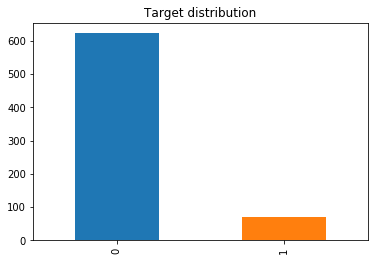

In [156]:
plot = df_locals_v8['target'].value_counts().plot(kind='bar',
                                            title='Target distribution')

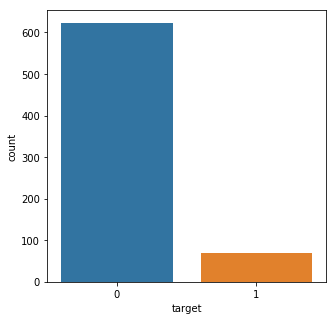

In [153]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(df_locals_v8['target'],label = 'Count')
plt.show()

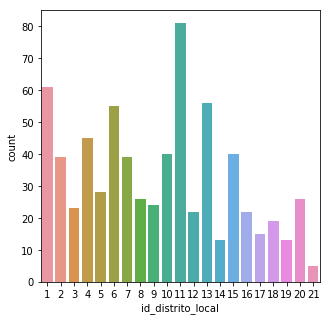

In [166]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(df_locals_v8['id_distrito_local'],label = 'Count')
plt.show()

## Base model
Onehot enconding   
Logistic regression   
Metrics: AUC, Precision, Recall   

In [187]:
# Load the library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [168]:
feature_names=['desc_distrito_local','total_local_act', 'total_locales', 
                        'target','num_loc_d','desc_tipo_agrup']
X = df_locals_v8[feature_names]
y = df_locals_v8['target']

Train and test

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Onehot encoding and scaling

In [178]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = ['total_local_act', 'total_locales','num_loc_d']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['desc_distrito_local', 'desc_tipo_agrup']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Classifier

In [179]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

Fit & metrics

In [180]:
logreg.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...enalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [181]:
pred = logreg.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[187   0]
 [ 21   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       187
           1       0.00      0.00      0.00        21

   micro avg       0.90      0.90      0.90       208
   macro avg       0.45      0.50      0.47       208
weighted avg       0.81      0.90      0.85       208



/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [189]:
pred = logreg.predict_proba(X_test)
pred

array([[0.88182728, 0.11817272],
       [0.92528489, 0.07471511],
       [0.98327209, 0.01672791],
       [0.95672491, 0.04327509],
       [0.90980633, 0.09019367],
       [0.81202559, 0.18797441],
       [0.82879701, 0.17120299],
       [0.98506525, 0.01493475],
       [0.93314353, 0.06685647],
       [0.97410484, 0.02589516],
       [0.8356759 , 0.1643241 ],
       [0.93913356, 0.06086644],
       [0.88265689, 0.11734311],
       [0.97693291, 0.02306709],
       [0.89411533, 0.10588467],
       [0.92457505, 0.07542495],
       [0.6781694 , 0.3218306 ],
       [0.933036  , 0.066964  ],
       [0.95758346, 0.04241654],
       [0.76025194, 0.23974806],
       [0.9557558 , 0.0442442 ],
       [0.82476946, 0.17523054],
       [0.97371146, 0.02628854],
       [0.82823124, 0.17176876],
       [0.84563405, 0.15436595],
       [0.95311832, 0.04688168],
       [0.94692728, 0.05307272],
       [0.96083181, 0.03916819],
       [0.94609516, 0.05390484],
       [0.66807922, 0.33192078],
       [0.

Text(0, 0.5, 'true_positives')

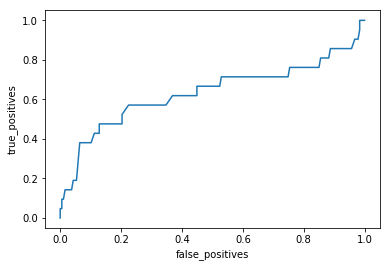

In [192]:
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,pred[:,target_pos])
plt.plot(fp,tp)
plt.xlabel("false_positives")
plt.ylabel("true_positives")

In [217]:
auc_logreg = auc(fp,tp)
auc_logreg

0.6334351922587215

In [231]:
result = pd.DataFrame(index=['recall','auc'])
result['logreg'] = [cross_val_score(logreg,X,y,scoring='recall').mean(),auc_logreg]

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [232]:
result

,logreg
recall,0.000000
auc,0.633435


## Modeling
- KNN   
- Decission tree   
- Randon forest  
- XGboost

### Kneighbourg

In [223]:
from sklearn.neighbors import KNeighborsClassifier

In [250]:
numeric_features = ['total_local_act', 'total_locales','num_loc_d']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['desc_distrito_local', 'desc_tipo_agrup']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [252]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', KNeighborsClassifier())])

param_grid={'classifier__n_neighbors':np.arange(4,100)}

clfk = GridSearchCV(pipe,param_grid,
                   cv = 5,
                   scoring = 'recall')

In [253]:
clfk.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('imputer', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbo...ki',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'classifier__n_neighbors': array([ 4,  5, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [255]:
clfk.best_score_

0.10440771349862259

In [256]:
clfk.best_params_

{'classifier__n_neighbors': 5}

In [257]:
preds2 = clfk.predict(X_test)
print(confusion_matrix(y_test,preds2))
print(classification_report(y_test,preds2))

[[184   3]
 [ 17   4]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       187
           1       0.57      0.19      0.29        21

   micro avg       0.90      0.90      0.90       208
   macro avg       0.74      0.59      0.62       208
weighted avg       0.88      0.90      0.88       208



In [258]:
pred2 = clfk.predict_proba(X_test)
pred2

array([[0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8,

Text(0, 0.5, 'true_positives')

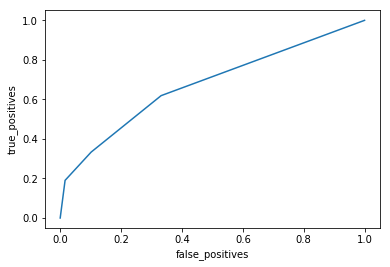

In [259]:
target_pos = 1 # Or 0 for the other class
fp,tp,_ = roc_curve(y_test,pred2[:,target_pos])
plt.plot(fp,tp)
plt.xlabel("false_positives")
plt.ylabel("true_positives")

In [262]:
auc_clfk = auc(fp,tp)
auc_clfk

0.6745607333842628

In [263]:
result['clfknn'] = [clfk.best_score_,auc_clfk]

In [264]:
result

,logreg,clfknn
recall,0.000000,0.104408
auc,0.633435,0.674561


### Decission Tree

### Random Forest

### XGBoost

## Compare Metrics

## Interpretabilitiy

### Permutations importance

with ELI5
To understand the features that are important for a model
If I shuffle the values of a feature and the result of the model doesn't change, it means that the feature is not relevant for the model
It is calculated after the model has been fit

In [265]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfk.best_estimator_,random_state=1).fit(X_test,y_test)
eli5.show_weights(perm, feature_names= X_test.columns.tolist())

ValueError: could not convert string to float: 'SALAMANCA           '